In [51]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing,Standardizing
from sklearn.preprocessing import StandardScaler

#For Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Models
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,precision_score,classification_report,plot_roc_curve

import warnings
warnings.filterwarnings('ignore')

In [80]:
df=pd.read_csv('Data file.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


# EDA

In [81]:
df.shape

(209593, 37)

The dataset has 209593 rows and 37 columns

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

We have int, float and object datatypes. label is our Target variable.

In [68]:
df.isna().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

There are no null values in our dataset

In [69]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In almost all columns, we see Standard Deviation more than Mean i.e Presence of Outliers.

In [70]:
df['pdate']=pd.to_datetime(df['pdate'])
df['Day']=df['pdate'].dt.day
df['Month']=df['pdate'].dt.month
df['Year']=df['pdate'].dt.year

Extracted Day, Month and Year from the date column

In [71]:
print(df['pcircle'].value_counts())
print(df['Year'].value_counts())

UPW    209593
Name: pcircle, dtype: int64
2016    209593
Name: Year, dtype: int64


There is only one unique variable in pcircle and Year. So we will drop them along with unwanted columns.

In [72]:
df.drop(columns=['Unnamed: 0','msisdn','pcircle','pdate','Year'],axis=1, inplace=True)

In [73]:
y=df['label']
X=df.drop(columns=['label'])

In [74]:
df.shape

(209593, 35)

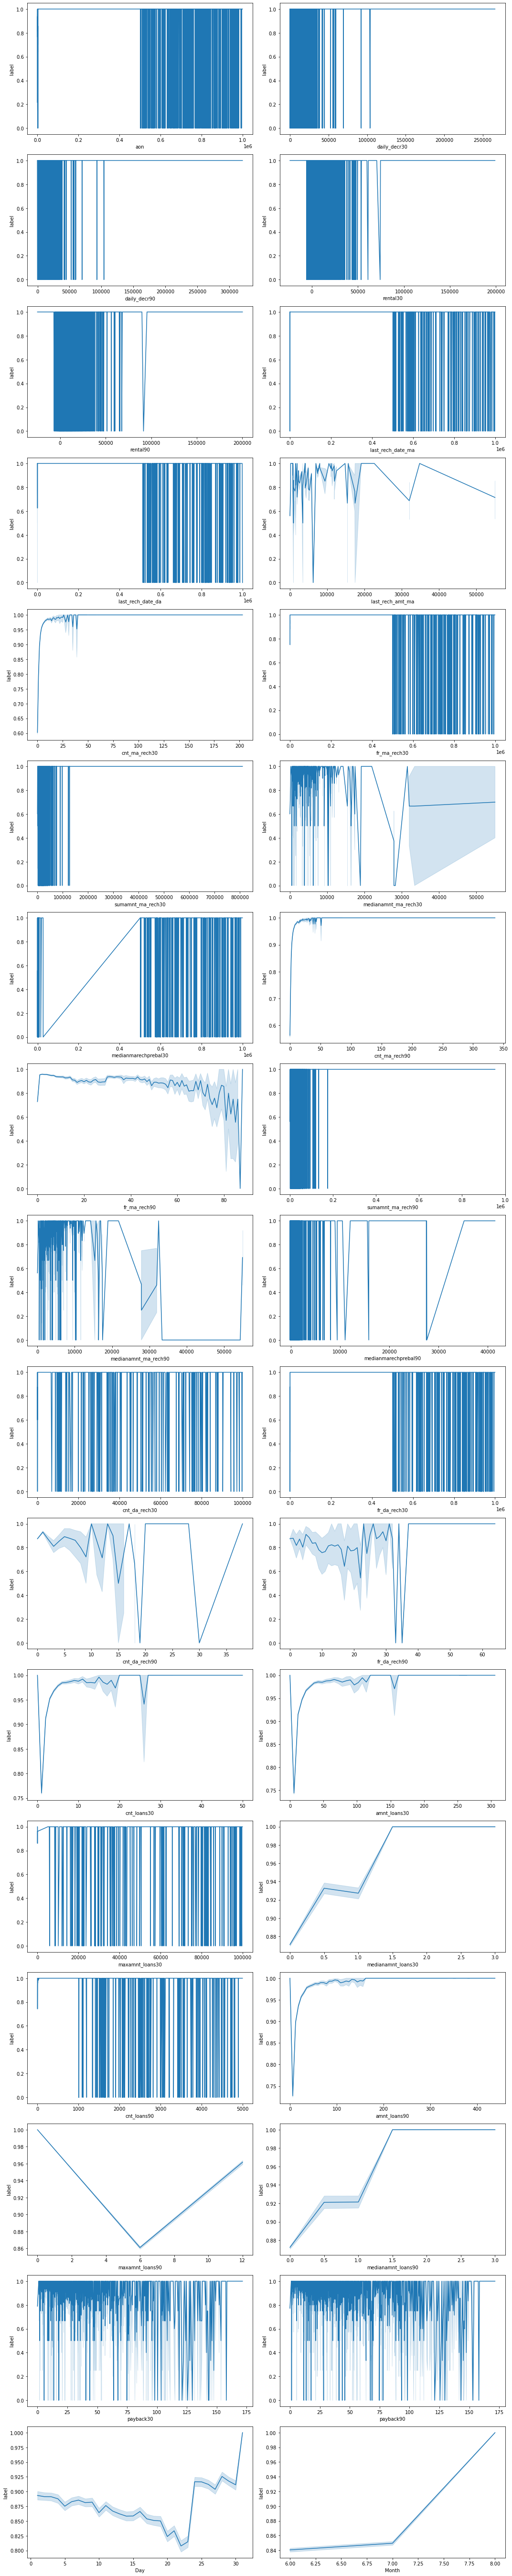

In [75]:
plt.figure(figsize=(15,75),facecolor='white')
plotnumber=1

for column in X:
    if plotnumber<=34:
        ax=plt.subplot(17,2,plotnumber)
        sns.lineplot(X[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('label',fontsize=10)
    
    plotnumber+=1
plt.tight_layout()

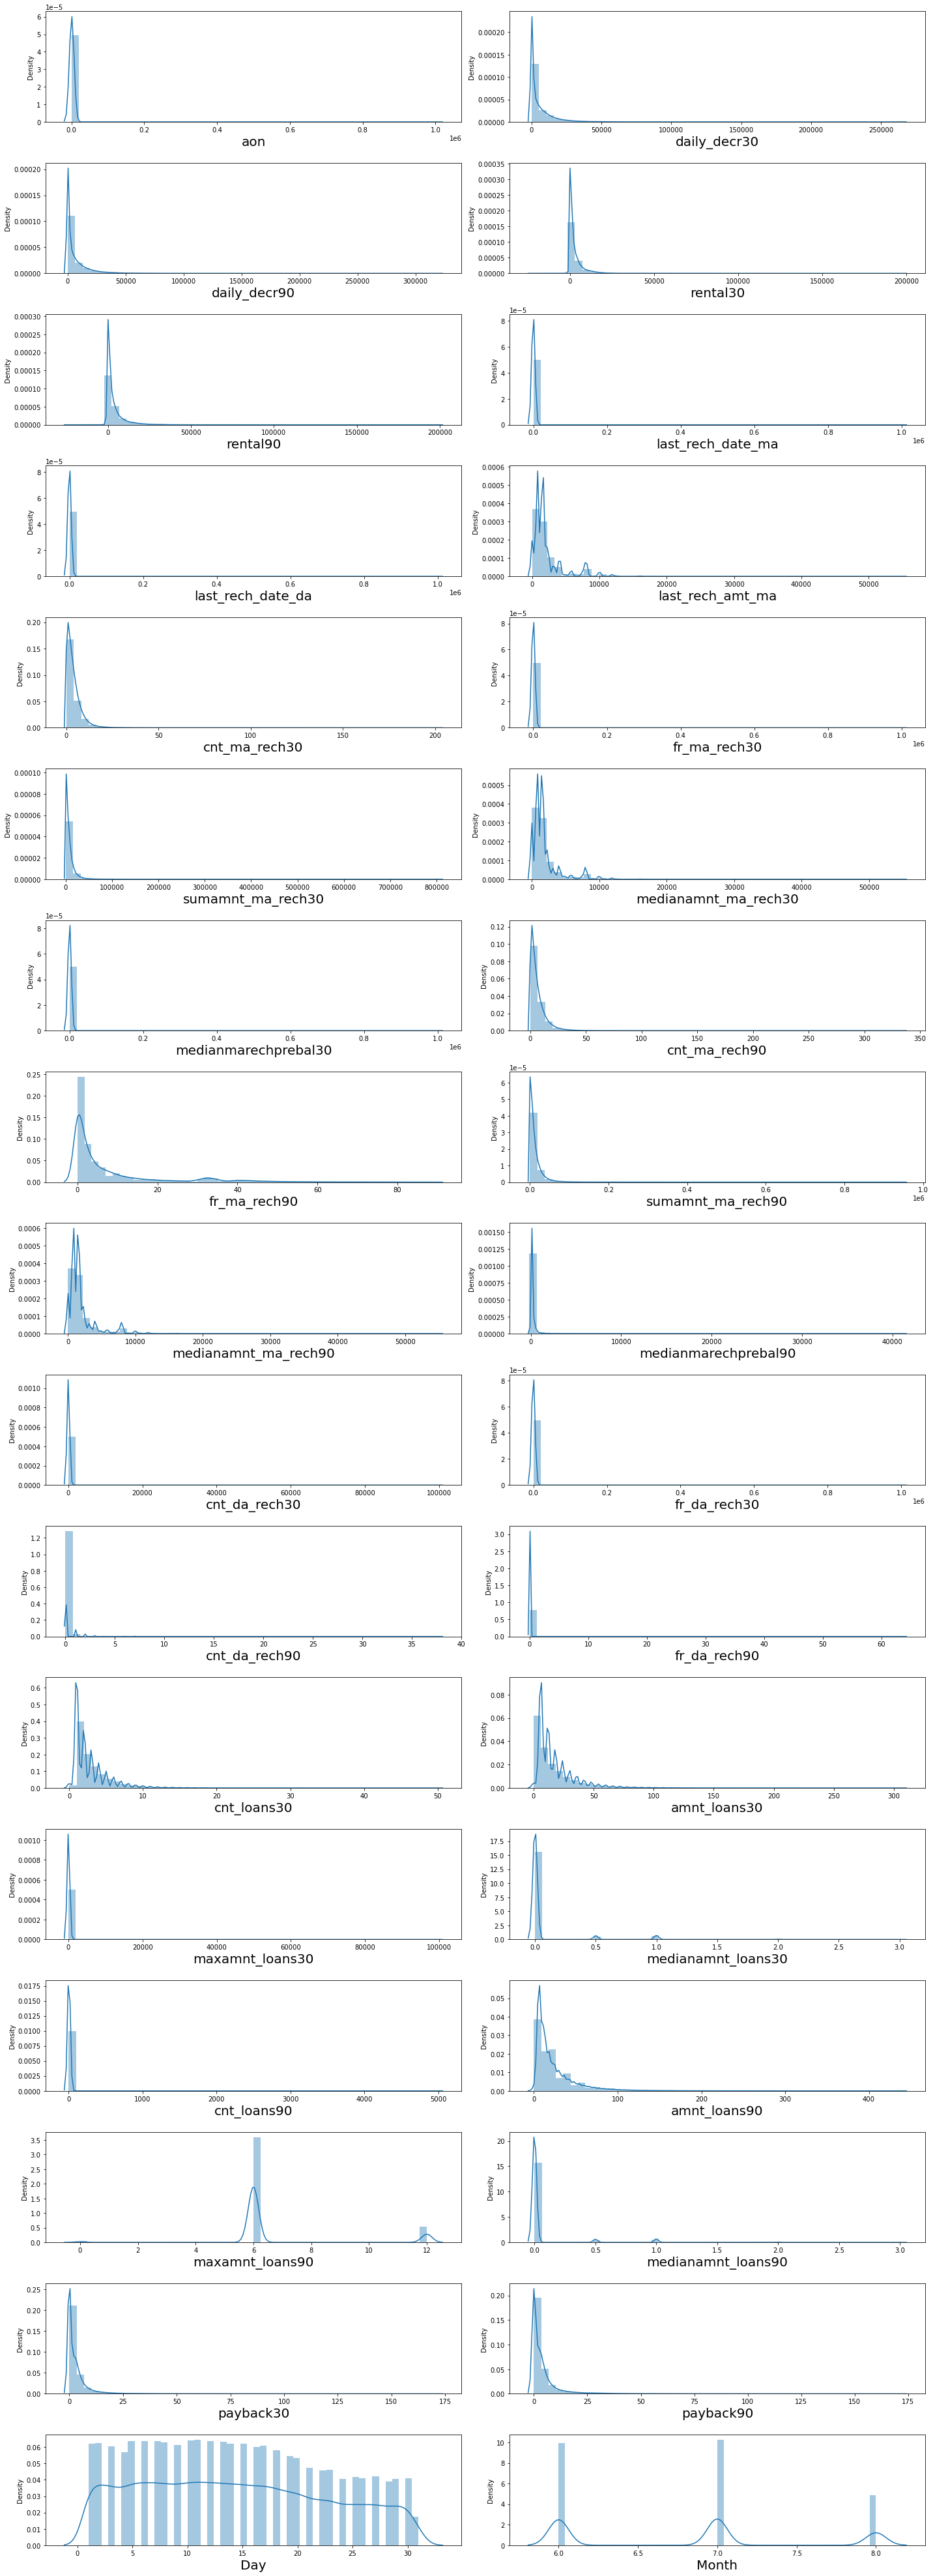

In [77]:
plt.figure(figsize=(20,55),facecolor='white')
plotnumber=1

for column in X:
    if plotnumber<=34:
        ax=plt.subplot(17,2,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.tight_layout()

In [79]:
plt.figure(figsize=(15,155),facecolor='white')
plotnumber=1

for column in X:
    if plotnumber<=34:
        ax=plt.subplot(17,2,plotnumber)
        sns.stripplot(X[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('label',fontsize=10)
    
    plotnumber+=1
plt.tight_layout()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000000000D56D280> (for post_execute):


KeyboardInterrupt: 

In [18]:
corr=df.corr()
corr.shape

(35, 35)

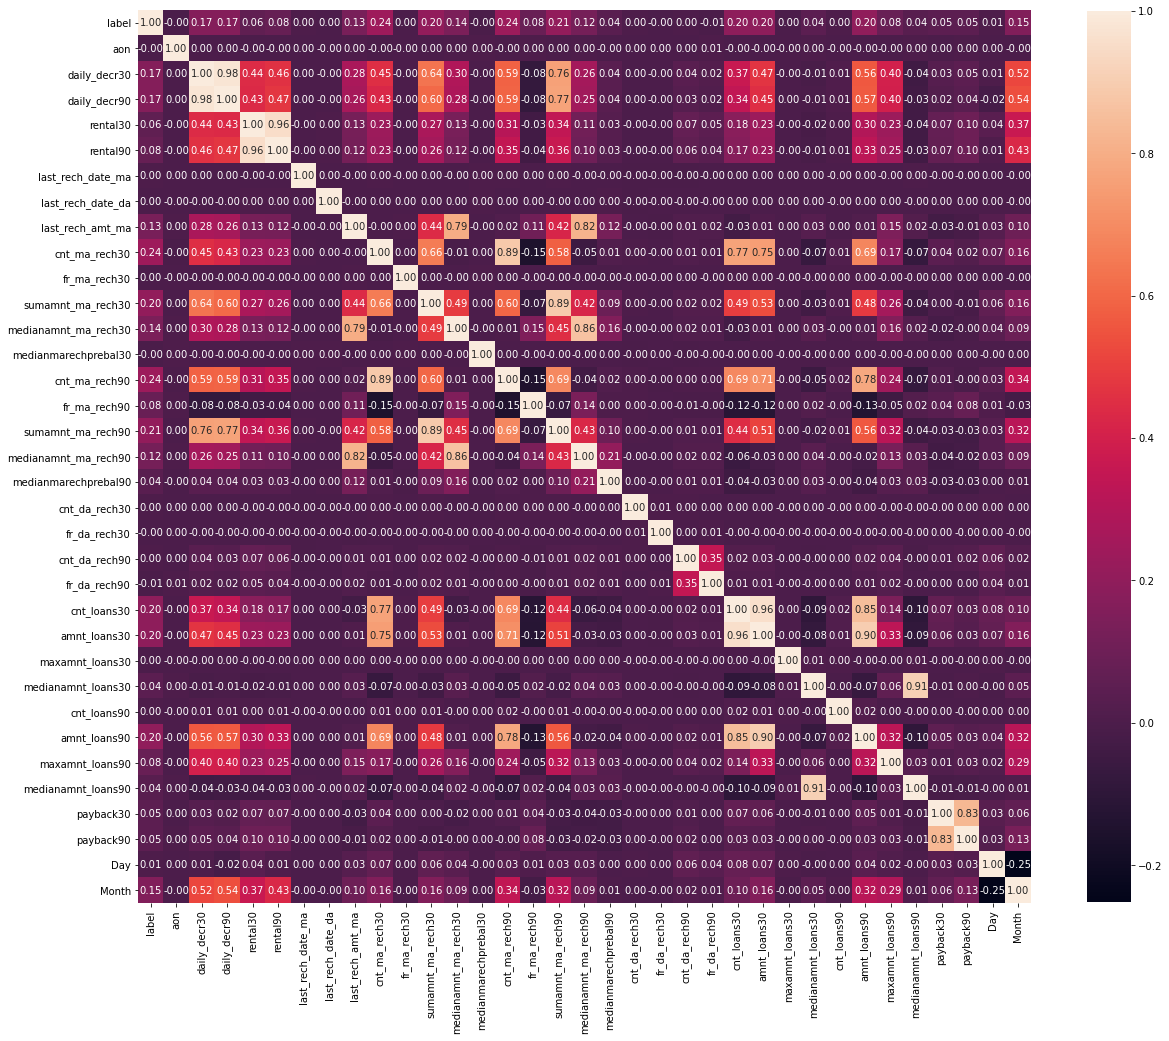

In [19]:
plt.figure(figsize=(20,20))

sns.heatmap(corr,cbar=True,square=True,cbar_kws={'shrink':0.82},fmt='.2f',annot=True,annot_kws={'size':10})
plt.show()

In [22]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,14.39894,6.797321
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,8.43890,0.741435
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,6.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.00000,6.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,14.00000,7.000000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,21.00000,7.000000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,31.00000,8.000000


# Outlier Identification & Removal

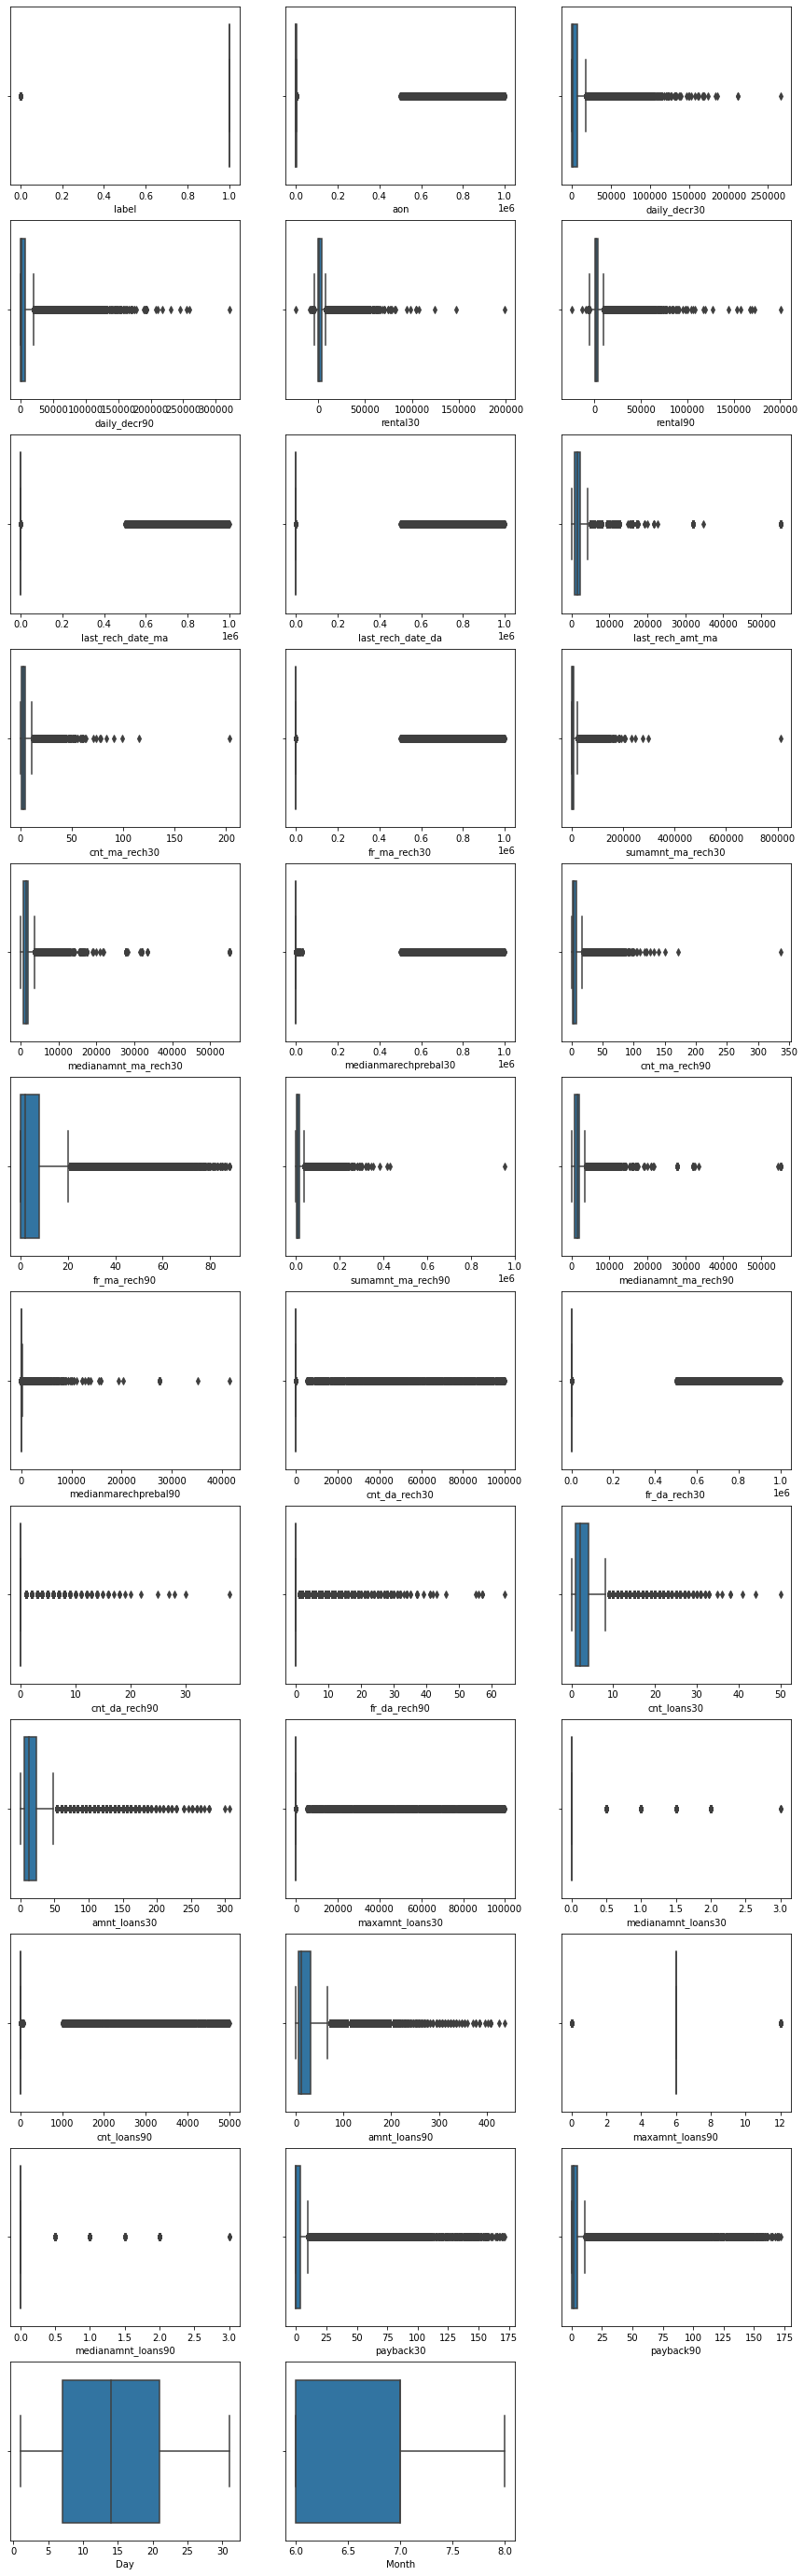

In [21]:
plt.figure(figsize=(15,50))
graph=1

for column in df:
    if(graph<=36):
        ax=plt.subplot(12,3,graph)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [5]:
#Find the IQR (inter quantile range) to identify outliers

q1=df.quantile(0.25) #1st quantile
q3=df.quantile(0.75) #3rd quantile

#IQR
iqr=q3-q1
iqr

label                       0.000
aon                       736.000
daily_decr30             7201.560
daily_decr90             7760.098
rental30                 3076.520
rental90                 3901.530
last_rech_date_ma           6.000
last_rech_date_da           0.000
last_rech_amt_ma         1539.000
cnt_ma_rech30               4.000
fr_ma_rech30                6.000
sumamnt_ma_rech30        8470.000
medianamnt_ma_rech30     1154.000
medianmarechprebal30       72.000
cnt_ma_rech90               6.000
fr_ma_rech90                8.000
sumamnt_ma_rech90       13683.000
medianamnt_ma_rech90     1151.000
medianmarechprebal90       64.710
cnt_da_rech30               0.000
fr_da_rech30                0.000
cnt_da_rech90               0.000
fr_da_rech90                0.000
cnt_loans30                 3.000
amnt_loans30               18.000
maxamnt_loans30             0.000
medianamnt_loans30          0.000
cnt_loans90                 4.000
amnt_loans90               24.000
maxamnt_loans9

In [6]:
index=np.where(df['cnt_loans30']>(q3.cnt_loans30)+(1.5*iqr.cnt_loans30))
df=df.drop(df.index[index])
print('Shape:',df.shape)
df.reset_index()

Shape: (201776, 35)


,index,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month
0,0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201771,209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,17,6
201772,209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,12,6
201773,209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,29,7
201774,209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,25,7


In [7]:
index=np.where(df['amnt_loans30']>(q3.amnt_loans30)+(1.5*iqr.amnt_loans30))
df=df.drop(df.index[index])
print('Shape:',df.shape)
df.reset_index()

Shape: (199177, 35)


,index,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month
0,0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199172,209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,17,6
199173,209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,12,6
199174,209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,29,7
199175,209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,25,7


In [8]:
index=np.where(df['rental90']<(q1.rental90)-(1.5*iqr.rental90))
df=df.drop(df.index[index])
print('Shape:',df.shape)
df.reset_index()

Shape: (199162, 35)


,index,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month
0,0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199157,209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,17,6
199158,209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,12,6
199159,209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,29,7
199160,209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,25,7


In [9]:
index=np.where(df['rental30']<(q1.rental30)-(1.5*iqr.rental30))
df=df.drop(df.index[index])
print('Shape:',df.shape)
df.reset_index()

Shape: (199152, 35)


,index,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month
0,0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199147,209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,17,6
199148,209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,12,6
199149,209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,29,7
199150,209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,25,7


In [10]:
df.skew()

label                   -2.190923
aon                     10.367188
daily_decr30             3.750386
daily_decr90             4.057330
rental30                 4.816737
rental90                 4.711133
last_rech_date_ma       14.812912
last_rech_date_da       14.865928
last_rech_amt_ma         3.775895
cnt_ma_rech30            3.100929
fr_ma_rech30            14.818654
sumamnt_ma_rech30        3.869173
medianamnt_ma_rech30     3.463424
medianmarechprebal30    14.786004
cnt_ma_rech90            3.392329
fr_ma_rech90             2.203350
sumamnt_ma_rech90        4.046312
medianamnt_ma_rech90     3.708594
medianmarechprebal90    44.019814
cnt_da_rech30           17.859236
fr_da_rech30            14.686340
cnt_da_rech90           27.778504
fr_da_rech90            29.674397
cnt_loans30              1.282033
amnt_loans30             1.193834
maxamnt_loans30         17.650124
medianamnt_loans30       4.453719
cnt_loans90             16.545402
amnt_loans90             2.104485
maxamnt_loans9

In [11]:
X=df.drop(columns=['label'],axis=1)
y=df['label']

In [12]:
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)
X=pd.DataFrame(X_scaler, columns=X.columns)

In [13]:
from sklearn.preprocessing import power_transform
new_data =power_transform(X, method='yeo-johnson')
X=pd.DataFrame(new_data, columns=X.columns)

In [14]:
X.skew()

aon                      3.145453
daily_decr30             0.524173
daily_decr90             0.560303
rental30                 0.308180
rental90                 0.383947
last_rech_date_ma       13.488809
last_rech_date_da       13.793386
last_rech_amt_ma         0.106365
cnt_ma_rech30            0.138012
fr_ma_rech30            13.879536
sumamnt_ma_rech30        0.214258
medianamnt_ma_rech30     0.051499
medianmarechprebal30     4.908443
cnt_ma_rech90            0.178001
fr_ma_rech90             0.555170
sumamnt_ma_rech90        0.259397
medianamnt_ma_rech90     0.039106
medianmarechprebal90    -0.760725
cnt_da_rech30           13.987867
fr_da_rech30            13.955023
cnt_da_rech90            6.041014
fr_da_rech90            15.947102
cnt_loans30              0.192522
amnt_loans30             0.188023
maxamnt_loans30         10.978393
medianamnt_loans30       3.361986
cnt_loans90              1.653773
amnt_loans90             0.278404
maxamnt_loans90         -1.651629
medianamnt_loa

In [15]:
y.value_counts()

1    173118
0     26034
Name: label, dtype: int64

In [16]:
#Balancing the class

from imblearn.over_sampling import SMOTE
SM=SMOTE()
X,y=SM.fit_resample(X,y)

y.value_counts()

1    173118
0    173118
Name: label, dtype: int64

In [17]:
vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X.columns

vif

,score,Features
0,1.000199,aon
1,26.507508,daily_decr30
2,29.032541,daily_decr90
3,12.861335,rental30
4,13.713379,rental90
5,1.000150,last_rech_date_ma
6,1.000147,last_rech_date_da
7,3.528372,last_rech_amt_ma
8,11.025815,cnt_ma_rech30
9,1.000181,fr_ma_rech30


<AxesSubplot:xlabel='amnt_loans30', ylabel='cnt_loans30'>

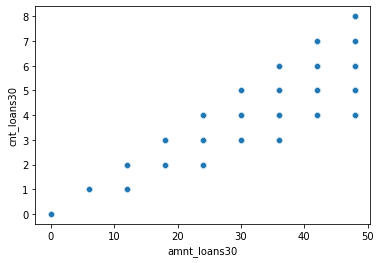

In [109]:
sns.scatterplot(df['amnt_loans30'],df['cnt_loans30'])

<AxesSubplot:xlabel='daily_decr90', ylabel='daily_decr30'>

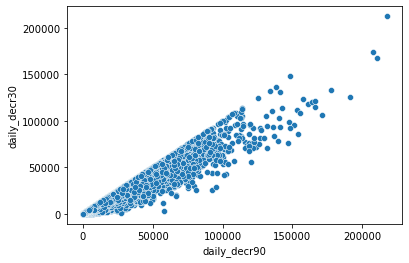

In [111]:
sns.scatterplot(df['daily_decr90'],df['daily_decr30'])

<AxesSubplot:xlabel='rental30', ylabel='rental90'>

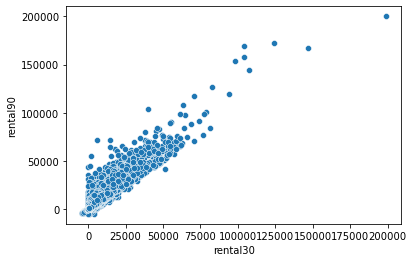

In [115]:
sns.scatterplot(df['rental30'],df['rental90'])

<AxesSubplot:xlabel='amnt_loans30', ylabel='amnt_loans90'>

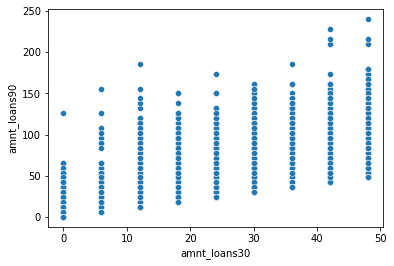

In [118]:
sns.scatterplot(df['amnt_loans30'],df['amnt_loans90'])

<AxesSubplot:xlabel='cnt_ma_rech30', ylabel='cnt_ma_rech90'>

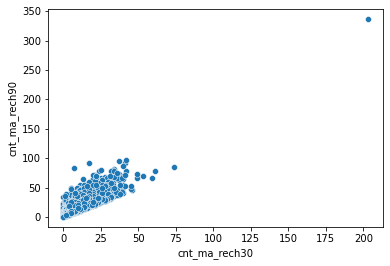

In [142]:
sns.scatterplot(df['cnt_ma_rech30'],df['cnt_ma_rech90'])

<AxesSubplot:xlabel='sumamnt_ma_rech30', ylabel='sumamnt_ma_rech90'>

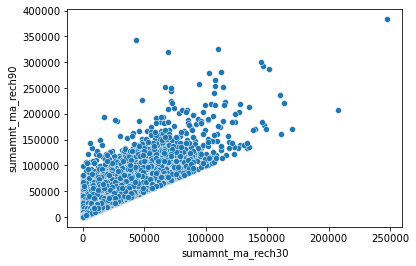

In [145]:
sns.scatterplot(df['sumamnt_ma_rech30'],df['sumamnt_ma_rech90'])

<AxesSubplot:xlabel='amnt_loans30', ylabel='amnt_loans90'>

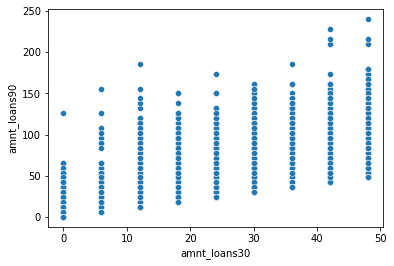

In [151]:
sns.scatterplot(df['amnt_loans30'],df['amnt_loans90'])

<AxesSubplot:xlabel='medianamnt_loans30', ylabel='medianamnt_loans90'>

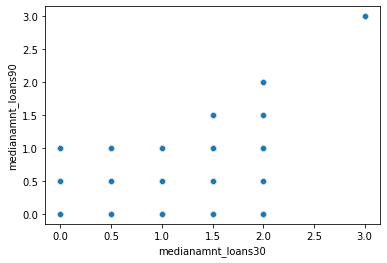

In [156]:
sns.scatterplot(df['medianamnt_loans30'],df['medianamnt_loans90'])

<AxesSubplot:xlabel='payback30', ylabel='payback90'>

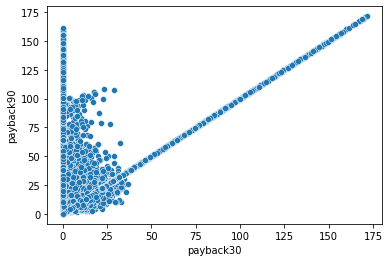

In [159]:
sns.scatterplot(df['payback30'],df['payback90'])

In [18]:
X.drop(columns=['cnt_loans30'],axis=1,inplace=True)

In [19]:
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X.columns

vif

,score,Features
0,1.017520,aon
1,214.268536,daily_decr30
2,225.481850,daily_decr90
3,29.106458,rental30
4,32.415063,rental90
5,1.025356,last_rech_date_ma
6,1.006241,last_rech_date_da
7,8.013559,last_rech_amt_ma
8,31.667980,cnt_ma_rech30
9,1.003946,fr_ma_rech30


In [20]:
X.drop(columns=['daily_decr90'],axis=1,inplace=True)

In [21]:
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X.columns

vif

,score,Features
0,1.017519,aon
1,4.758561,daily_decr30
2,27.687916,rental30
3,30.791570,rental90
4,1.025333,last_rech_date_ma
5,1.006239,last_rech_date_da
6,8.009953,last_rech_amt_ma
7,31.660677,cnt_ma_rech30
8,1.003932,fr_ma_rech30
9,38.928096,sumamnt_ma_rech30


In [22]:
X.drop(columns=['rental90'],axis=1,inplace=True)

In [23]:
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X.columns

vif

,score,Features
0,1.017447,aon
1,4.755528,daily_decr30
2,1.417784,rental30
3,1.025331,last_rech_date_ma
4,1.006225,last_rech_date_da
5,8.009930,last_rech_amt_ma
6,31.616556,cnt_ma_rech30
7,1.003911,fr_ma_rech30
8,38.693316,sumamnt_ma_rech30
9,8.619936,medianamnt_ma_rech30


In [24]:
X.drop(columns=['cnt_ma_rech90'],axis=1,inplace=True)

In [25]:
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X.columns

vif

,score,Features
0,1.016680,aon
1,4.754995,daily_decr30
2,1.417706,rental30
3,1.021915,last_rech_date_ma
4,1.006206,last_rech_date_da
5,7.718335,last_rech_amt_ma
6,6.021685,cnt_ma_rech30
7,1.003905,fr_ma_rech30
8,21.258194,sumamnt_ma_rech30
9,8.138554,medianamnt_ma_rech30


In [26]:
X.drop(columns=['sumamnt_ma_rech30'],axis=1,inplace=True)

In [27]:
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X.columns

vif

,score,Features
0,1.016220,aon
1,4.753629,daily_decr30
2,1.416350,rental30
3,1.021879,last_rech_date_ma
4,1.006186,last_rech_date_da
5,7.661145,last_rech_amt_ma
6,4.237888,cnt_ma_rech30
7,1.003819,fr_ma_rech30
8,4.946575,medianamnt_ma_rech30
9,1.394051,medianmarechprebal30


In [28]:
X.drop(columns=['amnt_loans90'],axis=1,inplace=True)

In [29]:
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X.columns

vif

,score,Features
0,1.015939,aon
1,4.738973,daily_decr30
2,1.415923,rental30
3,1.021822,last_rech_date_ma
4,1.006186,last_rech_date_da
5,7.660896,last_rech_amt_ma
6,4.207586,cnt_ma_rech30
7,1.003819,fr_ma_rech30
8,4.939113,medianamnt_ma_rech30
9,1.393957,medianmarechprebal30


In [30]:
X.drop(columns=['medianamnt_ma_rech90'],axis=1,inplace=True)

In [31]:
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X.columns

vif

,score,Features
0,1.015937,aon
1,4.661112,daily_decr30
2,1.415921,rental30
3,1.018350,last_rech_date_ma
4,1.006186,last_rech_date_da
5,4.124401,last_rech_amt_ma
6,4.000408,cnt_ma_rech30
7,1.003817,fr_ma_rech30
8,4.005750,medianamnt_ma_rech30
9,1.391493,medianmarechprebal30


In [32]:
X.drop(columns=['medianamnt_loans30'],axis=1,inplace=True)

In [33]:
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X.columns

vif

,score,Features
0,1.015937,aon
1,4.660829,daily_decr30
2,1.415907,rental30
3,1.018346,last_rech_date_ma
4,1.006171,last_rech_date_da
5,4.123171,last_rech_amt_ma
6,3.993922,cnt_ma_rech30
7,1.003811,fr_ma_rech30
8,4.005021,medianamnt_ma_rech30
9,1.391472,medianmarechprebal30


In [34]:
X.drop(columns=['payback30'],axis=1,inplace=True)

In [35]:
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X.columns

vif

,score,Features
0,1.015892,aon
1,4.660685,daily_decr30
2,1.415732,rental30
3,1.018321,last_rech_date_ma
4,1.006171,last_rech_date_da
5,4.118787,last_rech_amt_ma
6,3.950496,cnt_ma_rech30
7,1.003623,fr_ma_rech30
8,4.002416,medianamnt_ma_rech30
9,1.390972,medianmarechprebal30


In [38]:
maxAccu=0
maxRs=0
for i in range(1,200):
    X_train,x_test,Y_train,y_test=train_test_split(X_scaler,y,test_size=0.25,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(X_train,Y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best accuracy is:",maxAccu,"on Random State",maxRs)

Best accuracy is: 0.9103963770376275 on Random State 63


In [36]:
X_train,x_test,Y_train,y_test=train_test_split(X_scaler,y,test_size=0.25,random_state=63)

In [37]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,Y_train)
pred=DTC.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91     43327
           1       0.92      0.90      0.91     43232

    accuracy                           0.91     86559
   macro avg       0.91      0.91      0.91     86559
weighted avg       0.91      0.91      0.91     86559



In [38]:
RFC=RandomForestClassifier()
RFC.fit(X_train,Y_train)
pred=RFC.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     43327
           1       0.96      0.94      0.95     43232

    accuracy                           0.95     86559
   macro avg       0.95      0.95      0.95     86559
weighted avg       0.95      0.95      0.95     86559



In [39]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76     43327
           1       0.77      0.74      0.76     43232

    accuracy                           0.76     86559
   macro avg       0.76      0.76      0.76     86559
weighted avg       0.76      0.76      0.76     86559



In [40]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train,Y_train)
pred=ada.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84     43327
           1       0.85      0.82      0.84     43232

    accuracy                           0.84     86559
   macro avg       0.84      0.84      0.84     86559
weighted avg       0.84      0.84      0.84     86559



In [41]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
pred=gbc.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     43327
           1       0.91      0.87      0.89     43232

    accuracy                           0.89     86559
   macro avg       0.89      0.89      0.89     86559
weighted avg       0.89      0.89      0.89     86559



In [42]:
import xgboost as xgb
xgb=xgb.XGBClassifier()
xgb.fit(X_train,Y_train)
pred=xgb.predict(x_test)
print(classification_report(y_test,pred))

[00:45:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     43327
           1       0.94      0.96      0.95     43232

    accuracy                           0.95     86559
   macro avg       0.95      0.95      0.95     86559
weighted avg       0.95      0.95      0.95     86559



In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
pred=knn.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89     43327
           1       0.98      0.77      0.86     43232

    accuracy                           0.88     86559
   macro avg       0.90      0.88      0.88     86559
weighted avg       0.90      0.88      0.88     86559



The accuracy of the folowing models:
1. Decision Tree Classifier: 91%
2. Random Forest Classifier: 95%
3. Logistic Regression: 76%
4. AdaBoost Classifier: 84%
5. Gradient Boosting Classifier: 89%
6. XGB: 95%
7. KNeighbors CLassifier: 88%

# Cross Validation

In [46]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(DTC,X_scaler,y,cv=5).mean())
print(cross_val_score(RFC,X_scaler,y,cv=5).mean())
print(cross_val_score(lr,X_scaler,y,cv=5).mean())
print(cross_val_score(ada,X_scaler,y,cv=5).mean())
print(cross_val_score(gbc,X_scaler,y,cv=5).mean())
print(cross_val_score(xgb,X_scaler,y,cv=5).mean())
print(cross_val_score(knn,X_scaler,y,cv=5).mean())

0.9045797613345428
0.9490551615280477
0.7595744029776663
0.8368223762961818
0.8891942256128355
[04:08:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:14:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:19:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to r

Since the highest accuracy is for Random Forest Classifier, we choose it as our best model.

# Hyperparameter Tuning

In [55]:
parameters={'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2'],'n_estimators':range(200,700,5),'max_depth':[4,5,6,7,8],'min_samples_split':[2,3,4,5],'min_samples_leaf':[1,2]}
rfc=RandomForestClassifier()
clf=RandomizedSearchCV(rfc, cv=5, param_distributions=parameters)
clf.fit(X_train,Y_train)

print(clf.best_params_)

{'n_estimators': 680, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 8, 'criterion': 'entropy'}


In [60]:
Final_model=RandomForestClassifier(n_estimators=680, min_samples_split=5, min_samples_leaf=1, max_features='auto',max_depth=8, criterion='entropy')
Final_model.fit(X_train,Y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy:',acc*100)

Accuracy: 84.34709273443546


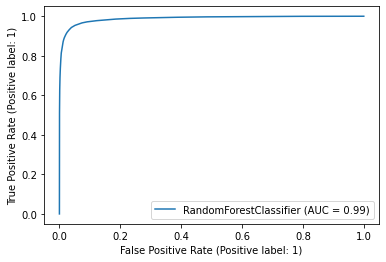

In [61]:
plot_roc_curve(RFC,x_test,y_test)
plt.show()

In [64]:
from sklearn.metrics import confusion_matrix
y_pred = RFC.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[41619,  1708],
       [ 2456, 40776]], dtype=int64)